   Tenor Product    Rate
0     6m   LIBOR  0.0250
1     1y     IRS  0.0280
2     2y     IRS  0.0300
3     3y     IRS  0.0315
4     4y     IRS  0.0325
5     5y     IRS  0.0330
6     7y     IRS  0.0350
7    10y     IRS  0.0370
8    15y     IRS  0.0400
9    20y     IRS  0.0450
10   30y     IRS  0.0500
The OIS discount factor is [0.9875782291103274, 0.9723894255697899, 0.9417668878676638, 0.9098314959834171, 0.8781005833383075, 0.8479001159165669, 0.7827138594869151, 0.6907474634081731, 0.5488299287649225, 0.4065925280216564, 0.22315340193188943]
---------------------------------------------------------------
   Tenor Product    Rate
0     6m   LIBOR  0.0250
1     1y     IRS  0.0280
2     2y     IRS  0.0300
3     3y     IRS  0.0315
4     4y     IRS  0.0325
5     5y     IRS  0.0330
6     7y     IRS  0.0350
7    10y     IRS  0.0370
8    15y     IRS  0.0400
9    20y     IRS  0.0450
10   30y     IRS  0.0500
[0.9876543209876544, 0.9727842084543422, 0.9423249680765795, 0.9104975206772443, 0.8788

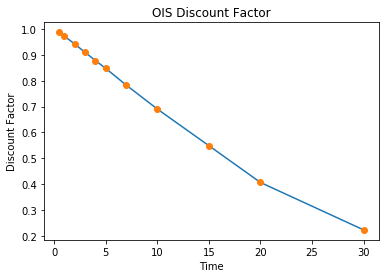

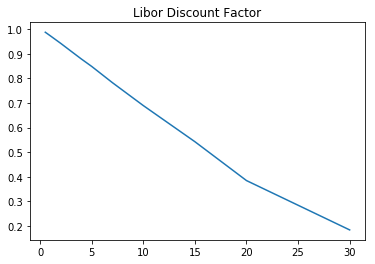

In [157]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  3 22:23:10 2019

@author: Harish Reddy
"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats import norm
from math import log, sqrt, exp
from scipy.optimize import least_squares
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

########################################## question 1*######################################


####################################Q1################################################

OIS=pd.read_excel('IR Data.xlsx')
OIS=OIS.iloc[:,0:3]
print(OIS)

tenor=[0.5,1,2,3,4,5,7,10,15,20,30]

discount_factor=[]
for i in range(11):
    D=1/(1+OIS.iloc[i,2]/360)**(tenor[i]*360)
    discount_factor.append(D)

print("The OIS discount factor is",discount_factor)

f1=interp1d(tenor,discount_factor) #OIS interpolation
xnew1=np.linspace(0.5,30) #different tenor

OIS_D=[]
for i in np.arange(0.5,30.5,0.5):
    OIS_D.append(f1(i).tolist())
    

print("---------------------------------------------------------------")
fig1=plt.figure()
ax1=fig1.subplots()
ax1.plot(xnew1,f1(xnew1),tenor,discount_factor,'o')
ax1.set_title("OIS Discount Factor")
ax1.set_xlabel("Time")
ax1.set_ylabel("Discount Factor")

###################################Q2##################################################

IRS=pd.read_excel('IR Data.xlsx')
IRS=IRS.iloc[:,0:3]
print(IRS)
#IRS['Tenor2']=[0.5,1,2,3,4,5,7,10,15,20,30]
IRS_rate=IRS['Rate'].tolist()
tenor=[0.5,1,2,3,4,5,7,10,15,20,30]

PV_fix=[0]*11
PV_flt=[0]*11
Libor_D=[0]*11
Libor_D[0]=1/(1+IRS_rate[0]*tenor[0])
PV_fix=[IRS_rate[i]*sum(OIS_D[s] for s in range(int(tenor[i]*2))) for i in range(11)]

def PV_IRS(i,ds):
    S=[]
    for s in range(int(tenor[i-1]*2),int(tenor[i]*2)):
        S.append(2*OIS_D[s]*((Libor_D[i-1]-ds)/(2*(tenor[i]-tenor[i-1])))/(Libor_D[i-1]
        -(s-int(tenor[i-1])*2+1)*(Libor_D[i-1]-ds)/((2*(tenor[i]-tenor[i-1])))))
    
    PV_flt[i]=PV_fix[i-1]+sum(S)
    return float(PV_fix[i]-PV_flt[i])
        
for i in range(1,11):
    ss=fsolve(lambda x:PV_IRS(i,x),0.5)[0]
    Libor_D[i]=ss
print(Libor_D)

x=[int((tenor[i+1]-tenor[i])*2) for i in range(10)]

f=[Libor_D[i]-Libor_D[i+1] for i in range(10)]
LD=[Libor_D[0]]
for i in range(1,10):
    for s in range(x[i]):
        LD.append(Libor_D[i]-f[i]*s/x[i])
LD.append(Libor_D[-1])
#V libor discount factor per 0.5y
fig2=plt.figure()
axe2=fig2.subplots()
axe2.plot(np.arange(0.5,30.5,0.5),LD)
axe2.set_title('Libor Discount Factor')

################################Q3###############################################
rate2=np.arange(1,30.5,0.5)
f2=interp1d(rate2,LD[1:]) #libor discount factor interpolation
f_x=interp1d(rate2,LD[1:],fill_value='extrapolate')

'''1y'''
rate1=np.arange(1.5,10.5,0.5) #we start from 1.5y instead of 1y
D=[] #libor discount factor from 1.5 to 10y
for i in rate1:
    D.append(f2(i).tolist())

swap_1y=[]
for i in range(1,10+1):
    rate_1y=(f2(1)-f2(i+1))/(0.5*sum(D[0:i*2]))
    swap_1y.append(rate_1y)

f1y=interp1d(range(1,11),swap_1y) #1y swap interpolation

print("---------------------------------------------------------------")
swap_1y1y=f1y(1).tolist()
print("1y x 1y",swap_1y1y)
swap_1y2y=f1y(2).tolist()
print("1y x 2y",swap_1y2y)
swap_1y3y=f1y(3).tolist()
print("1y x 3y",swap_1y3y)
swap_1y5y=f1y(5).tolist()
print("1y x 5y",swap_1y5y)
swap_1y10y=f1y(10).tolist()
print("1y x 10y",swap_1y10y)

'''5y'''
rate1=np.arange(5.5,15.5,0.5) #we start from 5.5y instead of 5y
D=[] #libor discount factor from 5 to 15y
for i in rate1:
    D.append(f2(i).tolist())

swap_5y=[]
for i in range(1,10+1):
    rate_5y=(f2(5)-f2(i+5))/(0.5*sum(D[0:i*2]))
    swap_5y.append(rate_5y)

f5y=interp1d(range(1,11),swap_5y) #1y swap interpolation

print("---------------------------------------------------------------")
swap_5y1y=f5y(1).tolist()
print("5y x 1y",swap_5y1y)
swap_5y2y=f5y(2).tolist()
print("5y x 2y",swap_5y2y)
swap_5y3y=f5y(3).tolist()
print("5y x 3y",swap_5y3y)
swap_5y5y=f5y(5).tolist()
print("5y x 5y",swap_5y5y)
swap_5y10y=f5y(10).tolist()
print("5y x 10y",swap_5y10y)

'''10y'''
rate1=np.arange(10.5,20.5,0.5) #we start from 5.5y instead of 5y
D=[] #libor discount factor from 5 to 15y
for i in rate1:
    D.append(f2(i).tolist())

swap_10y=[]
for i in range(1,10+1):
    rate_10y=(f2(10)-f2(i+10))/(0.5*sum(D[0:i*2]))
    swap_10y.append(rate_10y)

f10y=interp1d(range(1,11),swap_10y) #1y swap interpolation

print("---------------------------------------------------------------")
swap_10y1y=f10y(1).tolist()
print("10y x 1y",swap_10y1y)
swap_10y2y=f10y(2).tolist()
print("10y x 2y",swap_10y2y)
swap_10y3y=f10y(3).tolist()
print("10y x 3y",swap_10y3y)
swap_10y5y=f10y(5).tolist()
print("10y x 5y",swap_10y5y)
swap_10y10y=f10y(10).tolist()
print("10y x 10y",swap_10y10y)

p = [1,2,3,5,10]
    
list_1 = [f1y(i).tolist() for i in p]
list_2 = [f5y(i).tolist() for i in p]
list_3 = [f10y(i).tolist() for i in p]
    
forward = list_1 + list_2 + list_3

##################################  question 2   #################################################################

df = pd.read_excel('IR Data.xlsx', 'Swaption',header=2)


alpha_values =[]

rho_values =[]

nu_values = []

optimum =[]

sigma_SABR=[]  ### Calculates at the money volatility ( corresponding to SABR model)

for i in range(len(df)):
    
    input_row_number = i+1
    
    row = input_row_number - 1  # input the row you want to compute in the 'df' dataframe
    
    T = int((df['Expiry'][row])[:-1]) #int((df['Expiry'][row])[:-1] # this is time you start your swap ( time to expiry)
    
    start = (1 + 2*(T-1)) + 1
    
    end  =  start + 2* int((df['Tenor'][row][:-1]))
    
    P = 0.5*(sum(LD[ start : end ]))
    
    S=forward[i]*100
     
  
    
    def Black76LognormalCall(S, K, sigma,T):
        d1 = (log(S/K)+(sigma**2/2)*T) / (sigma*sqrt(T))
        d2 = d1 - sigma*sqrt(T)
        return (S*norm.cdf(d1) - K*norm.cdf(d2))
    
    def Black_put(S,K,sigma,T):
        d1 = (log(S/K)+(sigma**2/2)*T) / (sigma*sqrt(T))
        d2 = d1 - sigma*sqrt(T)
        return ( K*norm.cdf(-d2) - S*norm.cdf(-d1) )
    
    def BachelierCall(S, K, sigma, T):
        d = (S-K)/(S*sigma*np.sqrt(T))
        return ( (S-K)*norm.cdf(d) + (S*sigma*np.sqrt(T)*norm.pdf(d)) )
    
    def Displaced_diffusion(S,K,sigma,T,beta):
        
        price = Black76LognormalCall(S/beta, (K+((1-beta)*S/beta)), sigma*beta, T)
        
        return price
        
    def Displaced_diffusion_put(S,K,sigma,T,beta):
        
        price = Black_put(S/beta, (K+((1-beta)*S/beta)), sigma*beta, T)
        
        return price
    
    
    def Implied_Vol_Displaced(S,K,T,beta,sigma):
        
        atm_sigma = sigma
                        
        price = P*Displaced_diffusion(S,K,atm_sigma,T,beta)
        
        H = lambda x : P*Black76LognormalCall(S, K, x,T)-price
        
        Volatility = brentq(H,-0.0001,1)
        
        return (Volatility)
    
    def Implied_Vol_Normal(S,K,T,sigma):
        
        atm_sigma = sigma
        
        price =  P*BachelierCall(S, K, atm_sigma,T)
        
        H = lambda x :  P*Black76LognormalCall(S, K, x,T)-price
        
        Volatility =  brentq(H,-0.0001,1)
        
        return (Volatility)
        
    
    h = [-200,-150,-100,-50,-25,0,25,50,100,150,200]
    
    
    strikes = [( int(x)/100 + S) for x in h]    # this will give strikes in percentage
    
    market_IV = df.loc[row,'-200bps':].tolist()   #  row here is the input you have to give - row = 0 means it is first row in 'df' dataframe
    
    #atm_sigma = df.loc[row,'ATM']/100   

    atm_sigma = df['ATM'][row]/100
    
    
    ################# optimumm beta
    
    be = np.arange(0.1,1,0.01)
    var = []     
    dff = pd.DataFrame({'strikes':strikes})
    
    dff['market']= market_IV
    
    for h in be:
        beta=h
        c='beta='+str(np.round(beta,1))
        
        for j in range(len(dff)):  
            
            K = dff.loc[j,'strikes']
            
            
            dff.loc[j,c] =  Implied_Vol_Displaced(S,K,T,beta,atm_sigma)*100
     
    l = dff.columns.tolist()
    
    xx = []
    
    for p in range(len(l)-2):
        xx.append(((dff.iloc[:,1]-dff.iloc[:,p+2])**2).mean())
        
    index=np.argmin(xx)
    
    optimum_beta =  np.round(be[index],2)
    
    optimum.append(optimum_beta)
    
################################################################
    
    betas = [0.2,0.4,0.6,0.8,1]
    
    
    col_names = ['strike','beta_0.2','beta_0.4','beta_0.6','beta_0.8','beta_1']
    
    Df = pd.DataFrame(columns=col_names)
    
    Df['strike'] = strikes
    
        
    for beta in betas:
        
        c = 'beta_' + str(np.round(beta,1))
                     
        for r in range(len(Df)):
            
            K = Df.loc[r,'strike']
            
            
            Df.loc[r,c] =  Implied_Vol_Displaced(S,K,T,beta,atm_sigma)*100
            
                                
    for o in range(len(Df)):
        
        K = Df.loc[o,'strike']
        
        
        Df.loc[o,'Normal implied Vol'] = (Implied_Vol_Normal(S,K,T,atm_sigma))*100
                        
       
    Df['Market_IV'] = market_IV
    
        
    def SABR(F, K, T, alpha, beta, rho, nu):
        X = K
        if F == K:
            numer1 = (((1 - beta)**2)/24)*alpha*alpha/(F**(2 - 2*beta))
            numer2 = 0.25*rho*beta*nu*alpha/(F**(1 - beta))
            numer3 = ((2 - 3*rho*rho)/24)*nu*nu
            VolAtm = alpha*(1 + (numer1 + numer2 + numer3)*T)/(F**(1-beta))
            sabrsigma = VolAtm
        else:
            z = (nu/alpha)*((F*X)**(0.5*(1-beta)))*np.log(F/X)
            zhi = np.log((((1 - 2*rho*z + z*z)**0.5) + z - rho)/(1 - rho))
            numer1 = (((1 - beta)**2)/24)*((alpha*alpha)/((F*X)**(1 - beta)))
            numer2 = 0.25*rho*beta*nu*alpha/((F*X)**((1 - beta)/2))
            numer3 = ((2 - 3*rho*rho)/24)*nu*nu
            numer = alpha*(1 + (numer1 + numer2 + numer3)*T)*z
            denom1 = ((1 - beta)**2/24)*(np.log(F/X))**2
            denom2 = (((1 - beta)**4)/1920)*((np.log(F/X))**4)
            denom = ((F*X)**((1 - beta)/2))*(1 + denom1 + denom2)*zhi
            sabrsigma = numer/denom
    
        return sabrsigma
    
    def sabrcalibration(x, strikes, vols, F, T):
        err = 0.0
        for i, vol in enumerate(vols):
            err += (vol - SABR(F, strikes[i], T,
                               x[0], 0.8, x[1], x[2]))**2
    
        return err
    
    
    initialGuess = [0.02, 0.2, 0.1]
    
    Df['Market_IV_indecimal'] = Df['Market_IV']/100
    
    res = least_squares(lambda x: sabrcalibration(x,
                                                  Df['strike'],
                                                  Df['Market_IV_indecimal'],
                                                  S,
                                                  T),
                        initialGuess)
    
    alpha = res.x[0]
    beta = 0.8
    rho = res.x[1]
    nu = res.x[2]
    
    alpha_values.append(alpha)
    
    rho_values.append(rho)
    
    nu_values.append(nu)
    
    
    
    for i in range(len(Df)):
        Df.loc[i, 'SABR IV'] = SABR(S, Df.loc[i, 'strike'], T, alpha, beta, rho, nu)*100
    
    sigma_SABR.append(Df['SABR IV'][5])
    
#    fig3 = plt.figure(figsize=(14,10))
#    
#    ax3 = fig3.add_subplot(111)
#    
#    ax3.plot(strikes,Df['beta_0.4'],linewidth=3.0)  
#    
#    ax3.plot(strikes,Df['beta_0.2'],linewidth=3.0)
#    
#    ax3.plot(strikes,Df['beta_0.6'],linewidth=3.0)  
#    
#    ax3.plot(strikes,Df['beta_0.8'],linewidth=3.0)  
#    
#    ax3.plot(strikes,Df['beta_1'],linewidth=3.0)  
#    
    
    
     
#    ax3.plot(strikes,Df['Normal implied Vol'],linewidth=3.0)
#    
#    ax3.plot(strikes,Df['SABR IV'],linewidth=3.0)   
#    ax3.plot(strikes,Df['Market_IV'],linewidth=3.0)
#    ax3.set_xlabel('strikes')
#    ax3.set_ylabel('Implied volatilty')  
#    
#    plt.legend()
#    plt.show()    
#           
#    print('Below Data frame has all Implied Volatility for different beta')
#    print(Df)
#    
#    print('alpha:',alpha)
#    print('rho:',rho)
#    print('nu:',nu)
#
#
#

strikes = [1,2,3,4,5,6,7,8]

prices_2year = []

for K in strikes:
    
    T = 2
    
    T_N =10
    
    start = (1 + 2*(T-1)) + 1
    
    end  =  start + 2* T_N
    
    P = 0.5*(sum(LD[ start : end ]))
    
        
    beta = 0.4 
    
    alpha = alpha_values[9] + 0.75*(alpha_values[4]-alpha_values[9])
    
    rho = rho_values[9] + 0.75*(rho_values[4]-rho_values[9])
    
    nu = nu_values[9] + 0.75*(nu_values[4]-nu_values[9])
    
    sigma = SABR(S, K, T, alpha, beta, rho, nu)
    
    
    prices_2year.append(P* Displaced_diffusion(S,K,sigma,T,beta))
    
    
strikes = [1,2,3,4,5,6,7,8]

prices_8year = []

for K in strikes:
    
    T = 8
    
    T_N = 10
    
    start = (1 + 2*(T-1)) + 1
    
    end  =  start + 2* T_N
    
    P = 0.5*(sum(LD[ start : end ]))
    
    
    
    beta =  0.4
    
    
    alpha = alpha_values[14] + 0.4*(alpha_values[9]-alpha_values[14])
    
    rho = rho_values[14] + 0.4*(rho_values[9]-rho_values[14])
    
    nu = nu_values[9] + 0.4*(nu_values[4]-nu_values[9])
    
    sigma = SABR(S, K, T, alpha, beta, rho, nu)
    
    
    prices_8year.append(P* Displaced_diffusion_put(S,K,sigma,T,beta))    


print("Prices for swaption with 2 year maturity")
print(prices_2year)    

print("Prices for swaption with 8 year maturity")
print(prices_8year)   



In [158]:


##################### question 3################################
# Q2.

from scipy.integrate import quad

# Required steps are :
# 1. Have functions for B76 put and call
# 2. Create the IRR function
# 3. Create the IRR' function
# 4. Create the IRR'' function
# 5. Create the h''(K) function
# 6. Create the CMS Rate function

#Vanilla call with Black76 lognormal model
def vanilla_call_B76_13(F, K, T, sigma): 
    d1 = (np.log (F / K) + (0.5 * (sigma ** 2) )* T ) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T) 
    van_call_b76_13 = (F * norm.cdf(d1, 0.0, 1.0) - K * norm.cdf(d2, 0.0, 1.0))   
    return van_call_b76_13    

#Vanilla put with Black76 lognormal model
def vanilla_put_B76_14(F, K, T, sigma): 
    d1 = (np.log (F / K) + (0.5 * (sigma ** 2) )* T ) / (sigma * np.sqrt(T)) 
    d2 = d1 - sigma * np.sqrt(T) 
    van_put_b76_14 = (K * norm.cdf(-d2, 0.0, 1.0) - F * norm.cdf(-d1, 0.0, 1.0))   
    return van_put_b76_14 

# Create a dataframe with all the corresponding inputs: 
# columns are : swaption_name, swaption forward rate, sigma_SABR, T
    
swaption_name = [ "1y x 1y"
                 ,"1y x 2y"
                 ,"1y x 3y"
                 ,"1y x 5y"
                 ,"1y x 10y"
                 ,"5y x 1y"
                 ,"5y x 2y"
                 ,"5y x 3y"
                 ,"5y x 5y"
                 ,"5y x 10y"
                 ,"10y x 1y"
                 ,"10y x 2y"
                 ,"10y x 3y"
                 ,"10y x 5y"
                 ,"10y x 10y"]

T_list = 5 * [1] + 5 * [5] + 5 * [10]

swap_fwd_rate_list = [ swap_1y1y
                      ,swap_1y2y
                      ,swap_1y3y
                      ,swap_1y5y
                      ,swap_1y10y
                      ,swap_5y1y
                      ,swap_5y2y
                      ,swap_5y3y
                      ,swap_5y5y
                      ,swap_5y10y
                      ,swap_10y1y
                      ,swap_10y2y
                      ,swap_10y3y
                      ,swap_10y5y
                      ,swap_10y10y]

sigma_SABR_in = [ i / 100 for i in sigma_SABR ]


tenor = [int((df['Tenor'][row][:-1])) for row in range(len(df))]


df_q3_2_input = pd.DataFrame({'swaption_name': swaption_name ,
                              'swap_fwd_rate_list': swap_fwd_rate_list , 
                              'sigma_SABR_in': sigma_SABR_in ,
                              'T_list': T_list,
                              'Tenor' : tenor})
    
# IRR Function:

    
def IRR ( expiry , delta, S ):
    
    #r = 1 / (1 + delta * S)
    
    #result = delta * ( r * ( 1 - r ** expiry) / ( 1 - r ) )
    
    result = (1-(1/((1+delta*S)**expiry)))/S
    
    return result

# IRR' Function:
    
def IRR_dif (expiry , delta, S):
    
    result = (-1/(S**2)) + (1/((S**2)*((1+delta*S)**expiry)))  + (expiry*delta)/((S)*((1+delta*S)**(expiry+1)))
    return result

# IRR'' Function:
    
def IRR_dif_dif (expiry , delta, S):
    
    result = (2/(S**3)) + (-2/((S**3)*((1+delta*S)**expiry)))  + (-expiry*delta)/((S**2)*((1+delta*S)**(expiry+1)))  + (expiry*delta)*((-1/((S**2)*((1+delta*S)**(expiry+1)))  + (-(expiry+1)*delta)/((S**2)*((1+delta*S)**(expiry+2)))))
    return result

# h''(K) Function:
    
def h_dif_dif (expiry , delta , K , g_K,  g_dif_K , g_dif_dif_K):
    
     result = (( IRR (expiry , delta, K ) * g_dif_dif_K
               - IRR_dif_dif (expiry , delta , K) * g_K
               - 2 * IRR_dif (expiry , delta , K) * g_dif_K ) / (IRR (expiry, delta, K) ** 2)
              + ((2 * ( IRR_dif (expiry, delta, K) ** 2 ) * g_K ) / IRR (expiry, delta, K) ** 3))
        
#      result = ( ( ( ( - 1* K * IRR_dif_dif (expiry , delta , K) ) 
#                   - ( 2 * IRR_dif (expiry , delta , K) ) ) / (( IRR (expiry , delta , K) ) ** 2) )
#                + ( ( 2 *  ( ( IRR_dif (expiry , delta , K) ) ** 2 ) * K ) / ( IRR (expiry , delta , K )  ** 3 ) )  )          
    
     return result


# CMS Rate part 3:
    
def cms_calc_3 (expiry , delta , sigma , F , T , x_star ):
    
    # Remember to put the g_K, g_dif_K, g_dif_dif_K paramaters in h_dif_dif (expiry , delta , K , g_K,  g_dif_K , g_dif_dif_K) function
    I_rec = quad(lambda x: h_dif_dif ( expiry , delta , x , x, 1 , 0) * IRR (expiry , delta , F) * vanilla_put_B76_14 ( F, x, T, sigma ) , 0 , x_star )
    I_pay = quad(lambda x: h_dif_dif ( expiry , delta , x , x, 1 , 0) * IRR (expiry , delta , F) * vanilla_call_B76_13 ( F, x, T, sigma ) , x_star , np.inf )
    
    result = F + I_rec[0]+ I_pay[0]
    return result

# Run the cms calculation function for all the 15 required forward rates

ref = 0
cms_rate = []

payout_freq = 2


for i in swaption_name:
        
    sigma = sigma_SABR_in[ref]
    F = swap_fwd_rate_list[ref]
    expiry = payout_freq * tenor[ref]
    T = T_list[ref]
    delta = 1 / payout_freq
    
    result = cms_calc_3 (expiry , delta , sigma, F, T, x_star = F )
    cms_rate.append(result)
    
    ref = ref + 1
    
## Preparing output for Q3. Part 2.:
df_q3_2_output = pd.DataFrame({'swaption_name': swaption_name ,
                              'swap_fwd_rate_list': swap_fwd_rate_list , 
                              'cms_rate': cms_rate})

df_q3_2_output['CMS Rate - Forward Swap Rate'] = df_q3_2_output['cms_rate'] - df_q3_2_output['swap_fwd_rate_list']

df_q3_2_output['CMS Rate - Forward Swap Rate'] = df_q3_2_output['CMS Rate - Forward Swap Rate'] * 10_000 
df_q3_2_output['CMS Rate - Forward Swap Rate'] = df_q3_2_output['CMS Rate - Forward Swap Rate'].apply(np.int64)

df_q3_2_output['swap_fwd_rate_list'] = round ( df_q3_2_output['swap_fwd_rate_list'], 6 ) * 100 
df_q3_2_output['cms_rate'] = round ( df_q3_2_output['cms_rate'], 6 ) * 100 

df_q3_2_output['CMS Rate - Forward Swap Rate'] = df_q3_2_output['CMS Rate - Forward Swap Rate'].astype(str) + " bps"


print (df_q3_2_output)

   swaption_name  swap_fwd_rate_list  cms_rate CMS Rate - Forward Swap Rate
0        1y x 1y              3.2064    3.3115                       10 bps
1        1y x 2y              3.3337    3.6465                       31 bps
2        1y x 3y              3.4102    3.8926                       48 bps
3        1y x 5y              3.5383    4.1281                       58 bps
4       1y x 10y              4.2149    5.3174                      110 bps
5        5y x 1y              3.9874    5.0001                      101 bps
6        5y x 2y              4.0685    6.1555                      208 bps
7        5y x 3y              4.0762    6.9945                      291 bps
8        5y x 5y              4.1827    7.7508                      356 bps
9       5y x 10y              4.4665    9.9580                      549 bps
10      10y x 1y              4.3968    6.9005                      250 bps
11      10y x 2y              4.4956    8.9224                      442 bps
12      10y 

In [243]:
##################### question 3################################
# Q1.


# Get the OIS Rates and IRS Rates:
OIS = pd.read_excel('IR Data.xlsx', 'OIS')  # took the OIS sheet of the excel

OIS = OIS.iloc[:,0:3]

tenor = [0.5,1,2,3,4,5,7,10,15,20,30]
discount_factor_ois = [1/(1+OIS.iloc[i,2]/360)**(tenor[i]*360) for i in range(len(tenor))]

req_tenor = [0.25 * i for i in range(1, 121)] ## create placeholders for 30 years, quarterly

df_req_tenor = pd.DataFrame({'tenor':req_tenor})

df_discount_factor_calc = pd.DataFrame({'tenor':tenor, 'discount_factor': discount_factor_ois})

## outer join on tenor
df_interpolated_discount_ois = pd.merge(df_req_tenor , df_discount_factor_calc, on = 'tenor',
                                    how = 'outer')

## linear interpolation of discount factors:
temp_list = np.array(df_interpolated_discount_ois['discount_factor'])

inds = np.arange(temp_list.shape[0])
good = np.where(np.isfinite(temp_list))
f = interp1d(inds[good], temp_list[good],bounds_error=False)
temp_list2 = np.where( np.isfinite(temp_list),temp_list,f(inds))
df_temp = pd.DataFrame({'interp_disc_factor':temp_list2 , 'tenor': req_tenor})

df_interpolated_discount_ois = pd.merge(df_interpolated_discount_ois , df_temp, on = 'tenor')

df_interpolated_discount_ois['interp_disc_factor'].iloc[0] = ( df_interpolated_discount_ois['interp_disc_factor'].iloc[1]
                                                              - df_interpolated_discount_ois['interp_disc_factor'].iloc[3]
                                                              + df_interpolated_discount_ois['interp_disc_factor'].iloc[2])
#print(df_interpolated_discount_ois)


In [160]:
n = np.arange(0.5,5.5,0.5)
N = np.arange(10.5,15.5,0.5)

frq = 1/2

F_q1 = []

for i in range(len(N)):
    
    rate = (LD[int(2*n[i]-1)] - LD[int(2*N[i]-1)])/(frq*((sum(LD[ int(2*n[i])  : int(2*N[i]-1) +1 ]))))
       
    F_q1.append(rate)

df_forward_10yCMS = pd.DataFrame({'n':n,'N':N,'Forward rates':F_q1})



listt = np.arange(0.25,30.25,0.25)
LD_2 =  [f_x(i) for i in listt ] 

       
n_2 = np.arange(0.25,10.25,0.25)
N_2 = np.arange(2.25,12.25,0.25)    
frq = 1/4
F_q2 = []

for i in range(len(N_2)):
    
    rate = (LD_2[int(4*n_2[i]-1)] - LD_2[int(4*N_2[i]-1)])/(frq*((sum(LD_2[ int(4*n_2[i])  : int(4*N_2[i]-1) +1 ]))))
        
    F_q2.append(rate)
    

df_forward_2yCMS = pd.DataFrame({'n':n_2,'N':N_2,'Forward rates':F_q2})


In [224]:
# PV of a leg receiving CMS10y semi-annually over the next 5 years
# PV of a leg receiving CMS2y quarterly over the next 10 years

payout_freq = [2 , 4]
CMS_dur = [10 , 2] #CMS tenor in yrs
payout_dur = [5 , 10] #payout duration in yrs

CMS_10y_over5y_semiannual = df_forward_10yCMS['Forward rates'].tolist()
CMS_2y_over10y_quarterly = df_forward_2yCMS['Forward rates'].tolist()
CMS_10y_over10_5y_annual = 1 * (10 - 5) * [1]

sigma_SABR_CMS_10y_over5y_semiannual = 2 * 5 * [0.25]
sigma_SABR_CMS_2y_over10y_quarterly = 4 * 10 * [0.29]
sigma_SABR_CMS_10y_over10_5y_annual = 1 * (10 - 5) * [1]

swap_rate_temp = []

## PV calculation function:

def PV_cms (payout_freq, CMS_dur, payout_dur , forward_list , sigma_SABR_list):
    ois_disc_fac_list = []
    for i in range(1, len(forward_list)+1):
        
        j = i * 1 / payout_freq
        req_disc_fac = df_interpolated_discount_ois.loc[df_interpolated_discount_ois['tenor'] == j]['interp_disc_factor']    
        ois_disc_fac_list.append(req_disc_fac.values[0]) 
        
    PV_sum = 0
        
    for i in range(1, len(ois_disc_fac_list) + 1):
        
        F = forward_list[i-1]
        expiry = CMS_dur * payout_freq
        delta = 1 / payout_freq
        sigma = sigma_SABR_list[i-1]
        T = delta * i
        
        cms_rate = cms_calc_3 (expiry , delta , sigma, F, T, x_star = F )
        PV_sum = PV_sum + ois_disc_fac_list[i-1] * ( 1 / payout_freq ) * cms_rate
        
    return PV_sum
            
## Run the PV_cms function for the two parts, CMS10y and CMS2y:

PV_out_CMS10y = PV_cms (payout_freq[0], CMS_dur[0], payout_dur[0] , CMS_10y_over5y_semiannual , sigma_SABR_CMS_10y_over5y_semiannual)

PV_out_CMS2y = PV_cms (payout_freq[1], CMS_dur[1], payout_dur[1] , CMS_2y_over10y_quarterly , sigma_SABR_CMS_2y_over10y_quarterly)
    
     
        

In [242]:
#### Part 4 ################

#### below is the forward for only one payoff #######################

n_o = 5

N_o = 15

deltaa = 1

F_onepayoff = (LD[int(2*n_o-1)] - LD[int(2*N_o-1)])/(deltaa*((sum(LD[ int(2*n_o)  : int(2*N_o-1) +1 ]))))
       

###### below are forwards if payoff spans for 10 years ###############

n_3 = np.arange(6,15.5,1)
N_3 = np.arange(16,25.5,1)

deltaa = 1

F_q3 = []

for i in range(len(N_3)):
    
    rate = (LD[int(2*n_3[i]-1)] - LD[int(2*N_3[i]-1)])/(deltaa*((sum(LD[ int(2*n_3[i])  : int(2*N_3[i]-1) +1 ]))))
       
    F_q3.append(rate)

df_forward_last = pd.DataFrame({'n':n_3,'N':N_3,'Forward rates':F_q3})

###### other inputs:

sigma_SABR_4 = 0.246
payout_freq = 1
CMS_dur = 1 #CMS tenor in yrs
# payout_dur = [5] #payout duration in yrs

# CMS Rate part 4:
    
def cms_calc_4_1 (expiry , delta , sigma , F , T , x_star ):
    
    # Remember to put the g_K, g_dif_K, g_dif_dif_K paramaters in h_dif_dif (expiry , delta , K , g_K,  g_dif_K , g_dif_dif_K) function
    I_rec = quad(lambda x: h_dif_dif ( expiry , delta , x , (x ** 0.25) - 0.2 , 0.25 * (x ** -0.75 ) , -3 / 16 * (x ** (-7/4) ) ) * IRR (expiry , delta , F) * vanilla_put_B76_14 ( F, x, T, sigma ) , 0 , x_star )
    I_pay = quad(lambda x: h_dif_dif ( expiry , delta , x , (x ** 0.25) - 0.2 , 0.25 * (x ** -0.75 ) , -3 / 16 * (x ** (-7/4) ) ) * IRR (expiry , delta , F) * vanilla_call_B76_13 ( F, x, T, sigma ) , x_star , np.inf )
    
    result = F + I_rec[0]+ I_pay[0]
    return result

tenor = 5
req_disc_fac = df_interpolated_discount_ois.loc[df_interpolated_discount_ois['tenor'] == tenor]['interp_disc_factor']
F = F_onepayoff
expiry = CMS_dur * payout_freq
delta = 1 / payout_freq
sigma = sigma_SABR_4
T = delta * i

cms_rate_4_1 = cms_calc_4_1 (expiry , delta , sigma, F, T, x_star = F )
PV_4_1 = req_disc_fac * ( 1 / payout_freq ) * cms_rate_4_1

## for part 4 q2, x_star = 0.0016

def cms_calc_4_2 (expiry , delta , sigma , F , T , x_star ):
    
    # Remember to put the g_K, g_dif_K, g_dif_dif_K paramaters in h_dif_dif (expiry , delta , K , g_K,  g_dif_K , g_dif_dif_K) function
    I_rec = quad(lambda x: h_dif_dif ( expiry , delta , x , (x ** 0.25) - 0.2 , 0.25 * (x ** -0.75 ) , -3 / 16 * (x ** (-7/4) ) ) * IRR (expiry , delta , F) * vanilla_put_B76_14 ( F, x, T, sigma ) , x_star , F)
    I_pay = quad(lambda x: h_dif_dif ( expiry , delta , x , (x ** 0.25) - 0.2 , 0.25 * (x ** -0.75 ) , -3 / 16 * (x ** (-7/4) ) ) * IRR (expiry , delta , F) * vanilla_call_B76_13 ( F, x, T, sigma ) , F , np.inf )
    
    result = F + I_rec[0]+ I_pay[0]
    return result

cms_rate_4_2 = cms_calc_4_2 (expiry , delta , sigma, F, T, x_star = 0.0016 )
PV_4_2 = req_disc_fac * ( 1 / payout_freq ) * cms_rate_4_2

print(PV_4_1)
print(PV_4_2)

19    0.092131
Name: interp_disc_factor, dtype: float64
19    0.092132
Name: interp_disc_factor, dtype: float64
